## Best Fit Line

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
import matplotlib
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import os
from sklearn.metrics import r2_score
sns.set(style = "darkgrid")
%matplotlib inline

In [84]:
dataset_path = os.getcwd() + '/data.csv'

In [85]:
data = pd.read_csv(dataset_path, sep=',', header=0)

### (a)
>Plot the data points using a scatter plot along with the best fit line found out
using linear regression (without regularisation).

In [86]:
def gradient_descent(X, y, coeff, eta, niter): # theta_i
    """
        eta: step size
        X: training set
        y: given predicted values for X
        return: coeff
    """
    n_iteration = 0
    
    while n_iteration < niter:
        h_theta = predict(X, coeff) - y
        gradient = np.zeros(coeff.shape[0]) # theta_0 included
        
        for i in range(0, coeff.shape[0]): # theta_i
            gradient[i] = np.sum(np.dot(h_theta, X[:, i]))
        
#         print(gradient)
        coeff = coeff - (2/X.shape[0])*eta*gradient
        
#         print('Iteration', n_iteration,' : ', loss(X, y, coeff)) # RMSE
        n_iteration = n_iteration + 1
    
    return coeff

In [87]:
def gradient_descent_l1(X, y, coeff, eta, alpha, niter): # theta_i
    """
        eta: step size
        X: training set
        y: given predicted values for X
        return: coeff
    """
    n_iteration = 0
    
    while n_iteration < niter:
        h_theta = predict(X, coeff) - y
        gradient = np.zeros(coeff.shape[0]) # theta_0 included
        
        for i in range(0, coeff.shape[0]): # theta_i
            gradient[i] = np.sum(np.dot(h_theta, X[:, i])) + alpha*np.sign(coeff[i])
        
#         print(gradient)
        coeff = coeff - (2/X.shape[0])*eta*gradient
        
#         print('Iteration', n_iteration,' : ', loss(X, y, coeff)) # RMSE
        n_iteration = n_iteration + 1
    
    return coeff

In [88]:
def gradient_descent_l2(X, y, coeff, eta, alpha, niter): # theta_i
    """
        eta: step size
        X: training set
        y: given predicted values for X
        return: coeff
    """
    n_iteration = 0
    
    while n_iteration < niter:
        h_theta = predict(X, coeff) - y
        gradient = np.zeros(coeff.shape[0]) # theta_0 included
        
        for i in range(0, coeff.shape[0]): # theta_i
            gradient[i] = np.sum(np.dot(h_theta, X[:, i])) + 2*alpha*coeff[i] 
        
#         print(gradient)
        coeff = coeff - (2/X.shape[0])*eta*gradient
        
#         print('Iteration', n_iteration,' : ', loss(X, y, coeff)) # RMSE
        n_iteration = n_iteration + 1
    
    return coeff

In [89]:
def loss(X, y, coeff): # J_theta is loss function : rmse
    """
        X: training set 2-d array
        y: given predicted values for X 1-d array
        return : root mean squared error
    """
    h_theta = predict(X, coeff) - y
    jtheta = (1/X.shape[0])*np.sum(np.power(h_theta, 2))
    return np.sqrt(jtheta) # RMSE = sqrt(Mean(residual^2))

In [90]:
def predict(X, coeff): # H_theta(x) 
    """
        x: Data point 1-d array
        coeff: 1-d array
        returns: prediction for all data points 1-d array
    """
    return np.dot(X, coeff)

In [91]:
bw_mean = np.mean(data.iloc[:, 0], axis=0)
bw_std = np.std(data.iloc[:, 0], axis=0)
brain_weight = (data.iloc[:, 0] - bw_mean)/bw_std

X_train = np.zeros((data.shape[0], 2)) # 1st col bias=1, 2nd col brain weight
X_train[:, 0] = 1
X_train[:, 1] = brain_weight
y_train = data.iloc[:, 1]

normalized_data = pd.DataFrame()
normalized_data['brain_weight'] = brain_weight
normalized_data['body_weight'] = data.iloc[:, 1]

In [103]:
eta = 0.1
niter = 100
coeff = np.zeros(data.shape[1])
theta = gradient_descent(X_train, y_train, coeff, eta, niter)
normalized_data['predicted_body_weight'] = theta[0] + theta[1]*brain_weight

### Scatter Plots

R^2 Score:  0.9408831151416476


<function matplotlib.pyplot.show(*args, **kw)>

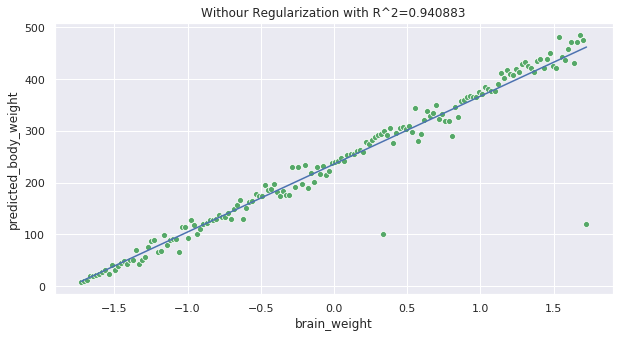

In [106]:
matplotlib.rc('figure', figsize=(10, 5))
r2_value = r2_score(normalized_data['body_weight'], normalized_data['predicted_body_weight'])
print('R^2 Score: ' , r2_value)
ax = sns.scatterplot(x='brain_weight', y='body_weight', data=normalized_data, color='g')
sns.lineplot(x='brain_weight', y='predicted_body_weight', data=normalized_data, color='b', ax=ax)
title = 'Withour Regularization with R^2=' + str(round(r2_value, 6))
ax.set_title(title)
plt.savefig('a')
plt.show

R^2 Score:  0.9408831151359248


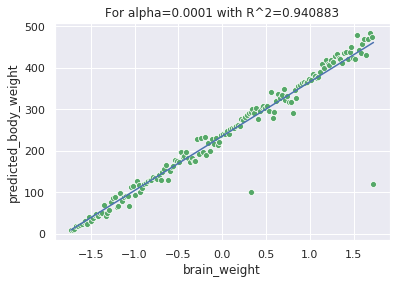

R^2 Score:  0.9408831145695556


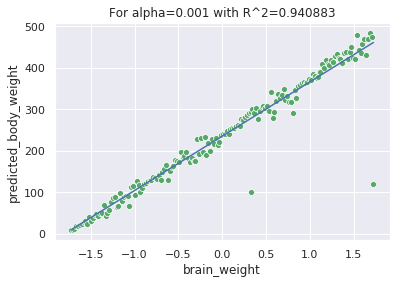

R^2 Score:  0.9408774079559533


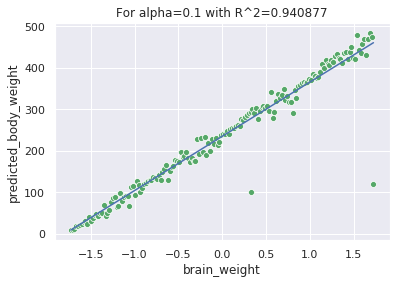

R^2 Score:  0.9403244893180971


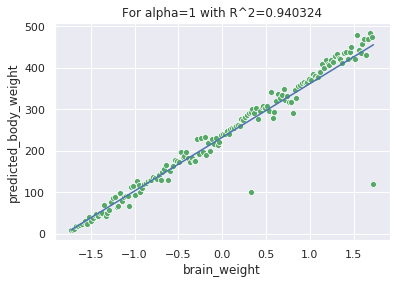

R^2 Score:  0.8952572415196551


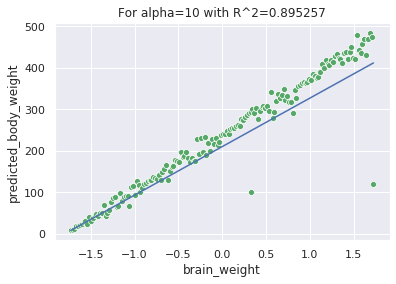

R^2 Score:  -0.24369110727277388


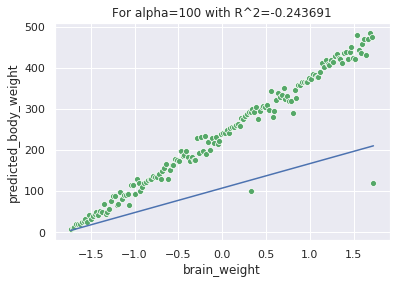

In [96]:
alpha2_list = [0.0001, 0.001, 0.1, 1, 10, 100] 

for alpha2 in alpha2_list:
    
    theta2 = gradient_descent_l2(X_train, y_train, coeff, eta, alpha2, niter)
    normalized_data['predicted_body_weight'] = theta2[0] + theta2[1]*brain_weight
#     matplotlib.rc('figure', figsize=(10, 5))
    r2 = r2_score(normalized_data['body_weight'], normalized_data['predicted_body_weight'])
    print('R^2 Score: ' , r2)
    ax = sns.scatterplot(x='brain_weight', y='body_weight', data=normalized_data, color='g')
    sns.lineplot(x='brain_weight', y='predicted_body_weight', data=normalized_data, color='b', ax=ax)
    title = 'For alpha='+ str(alpha2) +' with R^2='+ str(round(r2, 6))
    ax.set_title(title)
    file_name = 'L2_' + str(alpha2)+ '.jpg'
    plt.savefig(file_name)
    plt.show()

R^2 Score:  0.9408831151416475


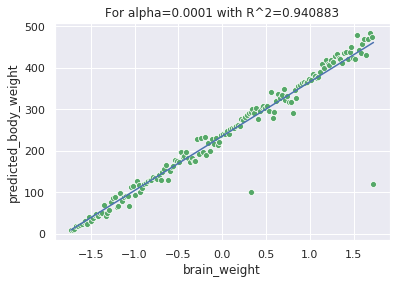

R^2 Score:  0.9408831151416436


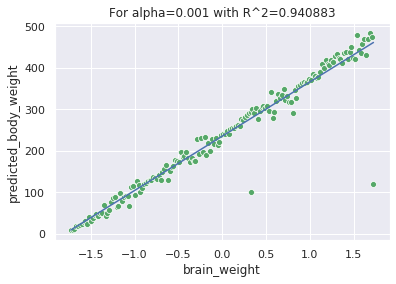

R^2 Score:  0.9408831151022766


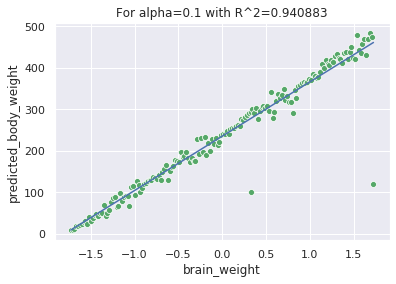

R^2 Score:  0.9408831112049975


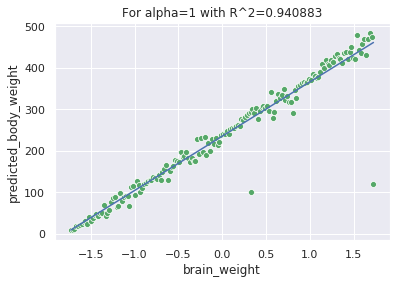

R^2 Score:  0.9408827214810557


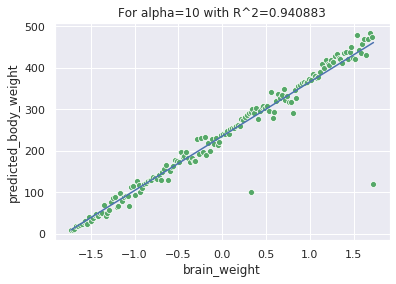

R^2 Score:  0.9408437491266326


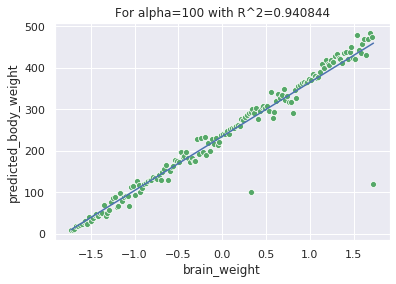

R^2 Score:  0.9369465140819363


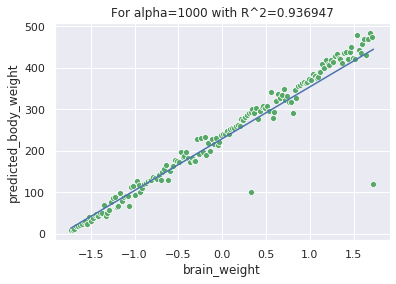

R^2 Score:  0.5472230135884055


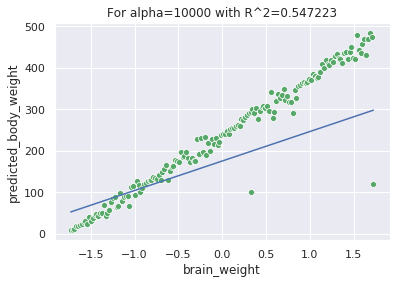

In [95]:
alpha1_list = [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000] 

for alpha1 in alpha1_list:
    
    theta1 = gradient_descent_l1(X_train, y_train, coeff, eta, alpha1, niter)
    normalized_data['predicted_body_weight'] = theta1[0] + theta1[1]*brain_weight
#     matplotlib.rc('figure', figsize=(10, 5))
    r2 = r2_score(normalized_data['body_weight'], normalized_data['predicted_body_weight'])
    print('R^2 Score: ' , r2_score(normalized_data['body_weight'], normalized_data['predicted_body_weight']))
    ax = sns.scatterplot(x='brain_weight', y='body_weight', data=normalized_data, color='g')
    sns.lineplot(x='brain_weight', y='predicted_body_weight', data=normalized_data, color='b', ax=ax)
    title = 'For alpha='+ str(alpha1) +' with R^2='+ str(round(r2, 6))
    ax.set_title(title)
    file_name = 'L1_' + str(alpha1)+ '.jpg'
    plt.savefig(file_name)
    plt.show()